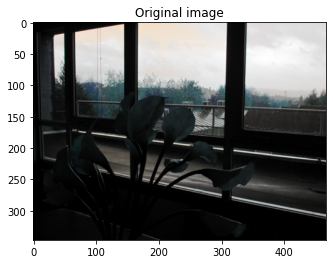

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


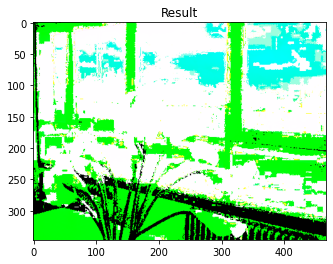

In [ ]:
import numpy as np
import numpy.matlib
import cv2
import matplotlib.pyplot as plt
import scipy.io
def HSVLCC(image):
        I = cv2.imread(image)/255
        img_float32 = np.float32(I)
        lab_image = cv2.cvtColor(img_float32, cv2.COLOR_RGB2HSV)
        HSV = lab_image
        Value=HSV[:,:,2]
        DFT2d_Value=np.fft.fft2(Value)
        [M , N]=np.shape(Value)
        sigma=4        
        Nr = np.fft.ifftshift(np.arange(-np.fix(M/2),np.ceil(M/2)))
        Nc = np.fft.ifftshift(np.arange(-np.fix(N/2),np.ceil(N/2)))
        [Nc,Nr] = np.meshgrid(Nc,Nr)
        dft_gauss_kernel=np.exp(-2*sigma*sigma*np.pi*np.pi*(np.power((Nr/M),2) + np.power((Nc/N),2)))
        DFT2d_Value_convolved=DFT2d_Value*numpy.matlib.repmat(dft_gauss_kernel,1,1)
        Value_convolved=np.fft.ifft2(DFT2d_Value_convolved)
        MValue=np.real(Value_convolved)
        out=np.zeros((M,N,3))
        for i in range(M):
            for j in range(N):
                out[i][j][2]=(Value[i][j])**(2**(2*MValue[i][j]-1))
        out[:,:,1]=HSV[:,:,1]
        out[:,:,0]=HSV[:,:,0]
        out=cv2.cvtColor(HSV, cv2.COLOR_BGR2HSV)
        plt.imshow(I)
        plt.title('Original image')
        plt.show()
        plt.imshow(out)
        plt.title('Result')
        plt.show()
        plt.hist(np.mean(I,2), bins=256, range=(0.0, 1.0), fc='k', ec='k')
        plt.title('Histogram of original')
        plt.show()
        plt.hist(np.mean(out,2), bins=256, range=(0.0, 1.0), fc='k', ec='k')
        plt.title('Histogramme of modified')
        plt.show()

image='input_1.png'
HSVLCC(image)